# 4 - Estatística Comparativa

- Nessa etapa vamos Comparar grupos, segmentos ou categorias para identificar diferenças relevantes que apoiem decisões de negócio, com intuito de ter uma visualização de quem perfomace melhor ou pior.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\JhoooN4Zz\OneDrive\Desktop\Meus breguesso de programação\Projetos\Analise de dados_Shopping_Behaviour_Dataset\Dados\dataset_tratado.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Média por cateria e estação

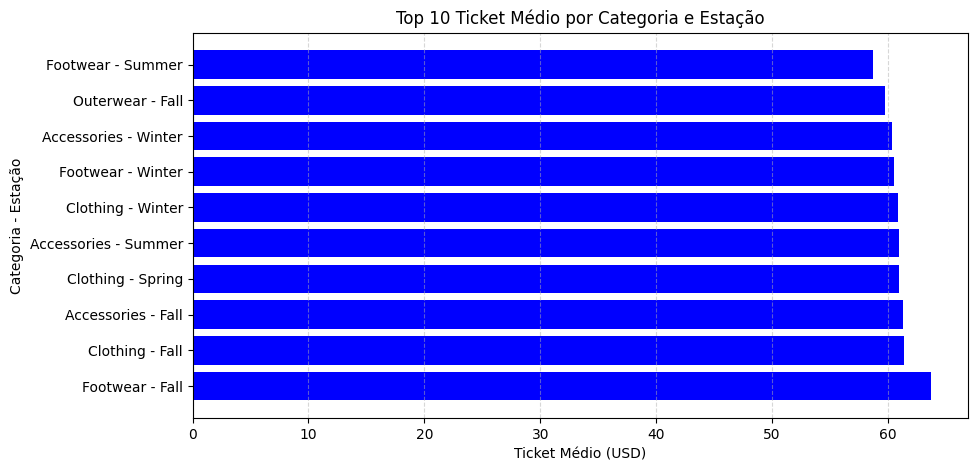

In [27]:
ticket_medio_categoria_estacao = (
    df.groupby(['Category','Season'])['Purchase Amount (USD)']
      .mean()
      .reset_index()
      .sort_values(by='Purchase Amount (USD)', ascending=False)
)

ticket_medio_categoria_estacao['Categoria_Estacao'] = (
    ticket_medio_categoria_estacao['Category'] + ' - ' +
    ticket_medio_categoria_estacao['Season']
)

top10 = ticket_medio_categoria_estacao.head(10)

plt.figure(figsize=(10,5))
plt.barh(top10['Categoria_Estacao'], top10['Purchase Amount (USD)'], color='b')
plt.xlabel('Ticket Médio (USD)')
plt.ylabel('Categoria - Estação')
plt.title('Top 10 Ticket Médio por Categoria e Estação')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig(r"C:\Users\JhoooN4Zz\OneDrive\Desktop\Meus breguesso de programação\Projetos\Analise de dados_Shopping_Behaviour_Dataset\Imagens/Média por cateria e estação.png", dpi=300, bbox_inches="tight")

- Obserção:

Com base na análise descritiva, observa-se que o outono (Fall) foi a estação que apresentou o maior faturamento total para a empresa. Ao avançar para a análise comparativa, esse padrão se mantém, uma vez que o outono também lidera o ticket médio quando analisado em conjunto com as categorias de produto.
Nesse período, as categorias Footwear, Clothing e Accessories destacam-se por apresentar os maiores valores médios por compra, indicando que o outono é um momento estratégico para a comercialização de produtos de maior valor agregado. Esse comportamento reforça a importância de priorizar ações de marketing, estoque e lançamentos durante essa estação.

## Média do faturamento do assinantes e nao assinantes

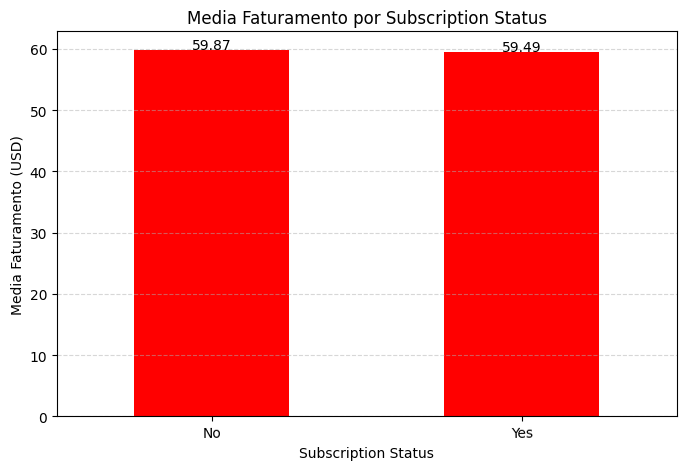

In [28]:
media_cliente = (
    df.groupby(['Subscription Status'])['Purchase Amount (USD)']
    .mean()
)

plt.figure(figsize=(8,5))
media_cliente.plot(kind='bar', color='r')

for i, valor in enumerate(media_cliente):
    plt.text(i, valor + 0.1, str(f'{valor:,.2f}'), ha='center', fontsize=10)

# Descrição do grafico
plt.title('Media Faturamento por Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Media Faturamento (USD)')
plt.xticks(rotation=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(r"C:\Users\JhoooN4Zz\OneDrive\Desktop\Meus breguesso de programação\Projetos\Analise de dados_Shopping_Behaviour_Dataset\Imagens/Média do faturamento do assinantes.png", dpi=300, bbox_inches="tight")

- Obeservação:

A análise comparativa do ticket médio entre clientes assinantes e não assinantes indica uma diferença pouco relevante entre os grupos, com média de USD 59,87 para não assinantes e USD 59,49 para assinantes. Esse resultado sugere que, atualmente, a assinatura não exerce influência significativa sobre o valor gasto por compra.
Diante desse cenário, a empresa pode avaliar estratégias para aumentar a atratividade do programa de assinatura, como a oferta de benefícios exclusivos, recompensas ou vantagens adicionais, com o objetivo de estimular a adesão de clientes não assinantes.

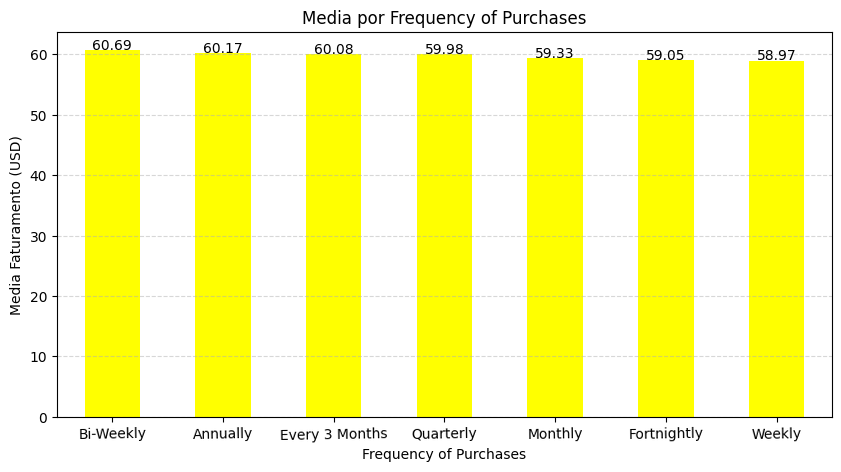

In [29]:
ticket_medio_frequencia = (
    df.groupby('Frequency of Purchases')['Purchase Amount (USD)']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
ticket_medio_frequencia.plot(kind='bar', color='yellow')

for i, valor in enumerate(ticket_medio_frequencia):
    plt.text(i, valor + 0.1, str(f'{valor:,.2f}'), ha='center', fontsize=10)

# Descrição do grafico
plt.title('Media por Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Media Faturamento (USD)')
plt.xticks(rotation=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(r"C:\Users\JhoooN4Zz\OneDrive\Desktop\Meus breguesso de programação\Projetos\Analise de dados_Shopping_Behaviour_Dataset\Imagens/Média por frequencia.png", dpi=300, bbox_inches="tight")

- Observação:

A análise comparativa do ticket médio por frequência de compra indica variações pouco expressivas entre os grupos. Observa-se que clientes com menor frequência de compra apresentam um ticket médio ligeiramente superior, enquanto clientes mais frequentes realizam compras de menor valor unitário, possivelmente compensadas por maior volume ao longo do tempo.

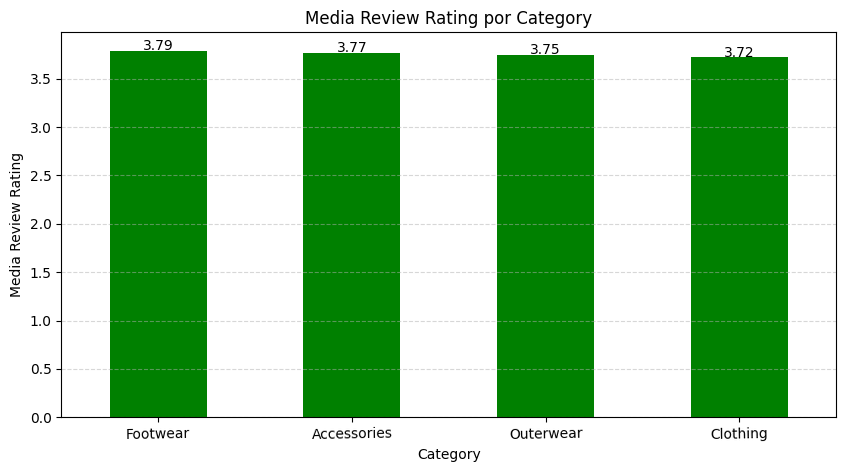

In [30]:
media_categoria_avaliacao = (
    df.groupby('Category')['Review Rating']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(10,5))
media_categoria_avaliacao.plot(kind='bar', color='g')

for i, valor in enumerate(media_categoria_avaliacao):
    plt.text(i, valor + 0.005, str(f'{valor:,.2f}'), ha='center', fontsize=10)

# Descrição do grafico
plt.title('Media Review Rating por Category')
plt.xlabel('Category')
plt.ylabel('Media Review Rating')
plt.xticks(rotation=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(r"C:\Users\JhoooN4Zz\OneDrive\Desktop\Meus breguesso de programação\Projetos\Analise de dados_Shopping_Behaviour_Dataset\Imagens/categoria_avaliacao.png", dpi=300, bbox_inches="tight")

- Observação:

Com base na analise a avaliação média dos produtos varia de forma sutil entre as categorias, com destaque positivo para Footwear. Por outro lado, a categoria Clothing, apesar de sua relevância em termos de faturamento, apresenta a menor avaliação média, indicando oportunidade de aprimoramento na experiência oferecida.

## Conclusão:

A partir das análises descritiva e comparativa, foi possível compreender os principais padrões de desempenho das vendas e do comportamento dos clientes. Observou-se que o outono (Fall) se destaca como a estação mais relevante para o negócio, apresentando tanto o maior faturamento total quanto os maiores tickets médios, especialmente nas categorias Footwear, Clothing e Accessories.

Além disso, verificou-se que o programa de assinatura, na forma como está estruturado atualmente, não impacta significativamente o valor gasto por compra, assim como a frequência de compra apresenta variações pouco expressivas no ticket médio, indicando diferentes perfis de consumo que se equilibram entre valor por transação e volume ao longo do tempo.

Por fim, a análise da avaliação média dos produtos revelou diferenças sutis entre as categorias, com destaque positivo para Footwear, enquanto Clothing, apesar de sua relevância no faturamento, apresenta menor nível de satisfação, sinalizando oportunidades de melhoria na experiência do cliente.

### Principais insights extraídos:

- As categorias Footwear, Clothing e Accessories apresentam maior ticket médio durante o outono, sugerindo foco estratégico em
mix de produtos de maior margem e destaque dessas categorias em campanhas sazonais.

- A similaridade no ticket médio entre assinantes e não assinantes indica que a assinatura não gera aumento direto no valor da compra, há oportunidade de revisar benefícios para torná-la mais atrativa.

- Estratégias diferenciadas por perfil, campanhas focadas em aumentar frequência ou valor médio, conforme o segmento.

- Apesar de forte participação no faturamento, a categoria Clothing apresenta a menor avaliação média, indicando possível gap entre volume de vendas e satisfação necessidade de melhorias em qualidade, variedade ou experiência pós-compra